# FCN

Fully Connected Network

## GPU Check

In [1]:
# # check available GPU in terminal: watch -d -n 0.5 nvidia-smi
# # select one GPU to train on:
# import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
# os.environ["CUDA_VISIBLE_DEVICES"]="2"

## Imports

In [1]:
import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '../estdel/'))

In [2]:
import nn.networks as networks
import nn.network_trainers as trainers
from nn.data_creation import Data_Creator_R
from nn.data_creation import data_manipulation as dm


## Load and Setup Data

In [3]:
# extract the redundant baselines and their gains and data from miriad and calfits files
red_bls, gains, uvd = dm.load_relevant_data('../zen_data/zen.2458098.58037.xx.HH.uv','../zen_data/zen.2458098.58037.xx.HH.uv.abs.calfits')

In [4]:
# seperate trining and testing redundant baselines 
# if we have not already done this, load them from disk
training_redundant_baselines_dict, testing_redundant_baselines_dict = dm.get_or_gen_test_train_red_bls_dicts(red_bls, gains.keys(),
                                        testing_load_path='../data/testing_redundant_baselines_dict_80.npz', training_load_path='../data/training_redundant_baselines_dict_80.npz')

# seperate the visiblites
training_baselines_data = dm.get_seps_data(training_redundant_baselines_dict, uvd)
testing_baselines_data = dm.get_seps_data(testing_redundant_baselines_dict, uvd)

***
## A

In [18]:
FNN_BN_R_aug14_c = networks.FNN_BN_R('FNN_BN_R_aug14_c',log_dir='../logs/',
                      layer_nodes=[512,256,128,128,64,64,32],
                      adam_initial_learning_rate = 0.0001)

In [19]:
FNN_BN_R_aug14_c.print_params()

{'accuracy_threshold': 0.00625,
 'adam_initial_learning_rate': 0.0001,
 'cost_name': 'MSE',
 'gaussian_shift_scalar': 1e-05,
 'layer_nodes': [512, 256, 128, 128, 64, 64, 32],
 'log_dir': '../logs/',
 'name': 'FNN_BN_R_aug14_c'}


In [20]:
trainer = trainers.FNN_BN_R_Trainer(FNN_BN_R_aug14_c,
                           Data_Creator_R,
                           num_epochs=500,
                           batch_size=32)

In [21]:
trainer.add_data((training_baselines_data, training_redundant_baselines_dict),
                 (testing_baselines_data, testing_redundant_baselines_dict),
                 gains,
                 num_flatnesses=100)


In [22]:
trainer.print_params()

{'batch_size': 32,
 'dropconnect_keep_prob': 0.9,
 'log_dir': '../logs/',
 'metric_names': ['MISGs', 'MSEs', 'PWTs'],
 'model_save_interval': 25,
 'name': 'FNN_BN_R_aug14_c',
 'num_epochs': 500,
 'pretrained_model_path': None,
 'sample_keep_prob': 0.8}


In [23]:
trainer.train()

saving metrics - saved

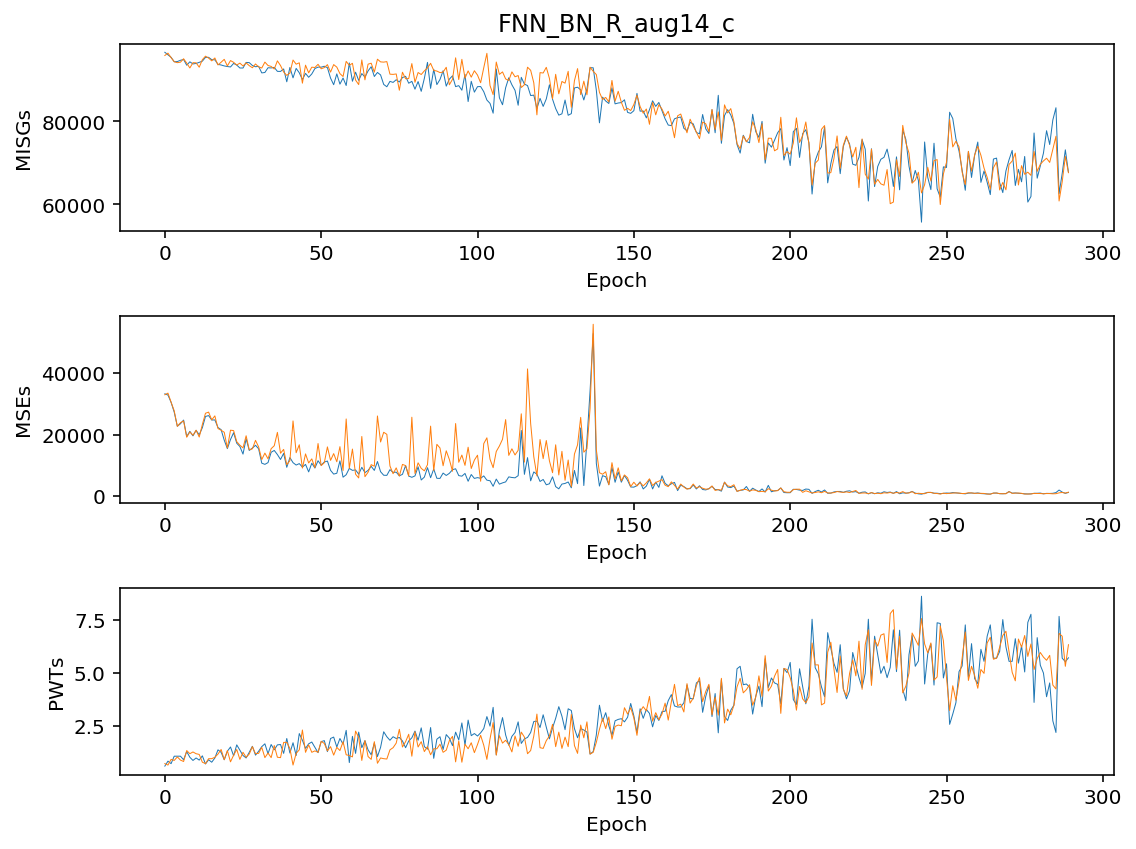

In [24]:
trainer.plot_metrics()